<a href="https://colab.research.google.com/github/YasmeenKararty/Linear-Regression-Using-Gradient-Descent/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries Needed**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Read DataSet**

In [2]:
data = pd.read_csv('Fish.csv')

In [3]:
X = data.drop(['Weight'], axis=1)
Y = data['Weight'].values.reshape(-1, 1)

**Label Encoding**

In [4]:
labelEncoder = LabelEncoder()
X['Species'] = labelEncoder.fit_transform(X['Species'])
X = X.values

**Standardization**

In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
X = np.hstack((np.ones((X.shape[0],1)), X))

In [19]:
print("XTrain Shape:", X.shape)

XTrain Shape: (159, 7)


In [21]:
print("YTrain Shape:", Y.shape)

YTrain Shape: (159, 1)


In [20]:
def calculateHypothesis(X, theta):
  return np.dot(X, theta)

In [10]:
def calculateCost(X, Y, YPredict):
  return 1/(2* Y.shape[0]) * np.sum(np.square(np.subtract(YPredict, Y)))

In [11]:
def calculateGradient(X, cost):
  return X.T.dot(cost) / X.shape[0]

In [12]:
def gradientDescentAlgorithm(X, Y, theta, learningRate, tolerance, maximumIterations, costs):
  
  currentCost = costs[0]
  for iteration in range(1,maximumIterations+1):
    
    if currentCost < tolerance:
      break
    else:
      YPredict = calculateHypothesis(X, theta)
      error = YPredict-Y
      gradient = calculateGradient(X, error)
      theta = np.subtract(theta, (learningRate * gradient))
      currentCost = calculateCost(X,Y,YPredict)
    if iteration % 10 == 0:
      costs[iteration] = currentCost


  return theta

In [13]:
theta = np.zeros((X.shape[1],1))
learningRate = 0.01
tolerance =  0.000001
maximumIterations = 400
costs = {0:10000}

In [14]:
print("Theta Shape:", theta.shape)

Theta Shape: (7, 1)


In [15]:
newTheta = gradientDescentAlgorithm(X, Y, theta, learningRate, tolerance, maximumIterations,costs)

Minumum Cost = 7288.6422261711705
Maximum Cost = 98550.19958509835


Text(0, 0.5, 'Cost')

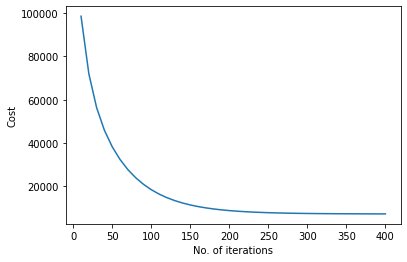

In [24]:
Iterations = [i for i in costs.keys()]
costsToBePlotted = [i for i in costs.values()]
print("Minumum Cost =", min(costsToBePlotted[1:]))
print("Maximum Cost =", max(costsToBePlotted[1:]))
plt.plot(Iterations[1:], costsToBePlotted[1:])
plt.xlabel('No. of iterations')
plt.ylabel('Cost')